<a href="https://colab.research.google.com/github/sychenry/RM2022-Embedded-Tutorial-Assignments/blob/master/OIMHS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OIMHS dataset
- dataset download: https://springernature.figshare.com/articles/dataset/OIMHS_dataset/23508453?file=42522673
- paper for dataset description: https://www.nature.com/articles/s41597-023-02675-1


# Dataset description for the segmentation task -- OIMHS
- OIMHS: An Optical Coherence Tomography Image Dataset Based on Macular Hole Manual Segmentation
- 3859 B-scan images of 119 patients (89 females and 30 males), with dilated pupils if necessary during the OCT tests
- Age of patient: mean age is 64.1 years, with a standard deviation of 11.5 years. Patient were grouped according to the age classification criteria provided by the World Health Organization (WHO) (cite: Ye 2023)
- All images are from Asian patient.
- Manual annotation by 3 junior ophthalmologists and corrected by 1 expert ophthalmologist.
- Public dataset, contributions: L. Shen et al, 2023, patients from the Ethics Committee of Zhejiang Provincial People's Hospital (QT2023024)

#Exploring the dataset -- Visualising some images and their corresponding masks.
1. Five colors, including the black as the background, are used. Annotated pixels are regions of retina, macular hole, intraretinal cysts and choroid.
- Red: Macular Hole         (MH)
- Blue: Intraretinal cysts (IRC)
- Green: Retina
- Yellow: Choroid
- Black: background

Notice that some images could be a subset of the five colors.


2. Images Size
- 220 images: 384 x 496 pixels
- 3002 images: 512 x 496 pixels
- 637 images: 768 x 496 pixels
Even though resolution is not determined completely by the number of pixels, we adhere point out the fact of having different OCT image sizes during image acquisition.
- All images were resized to 500x500 when it was publicized.


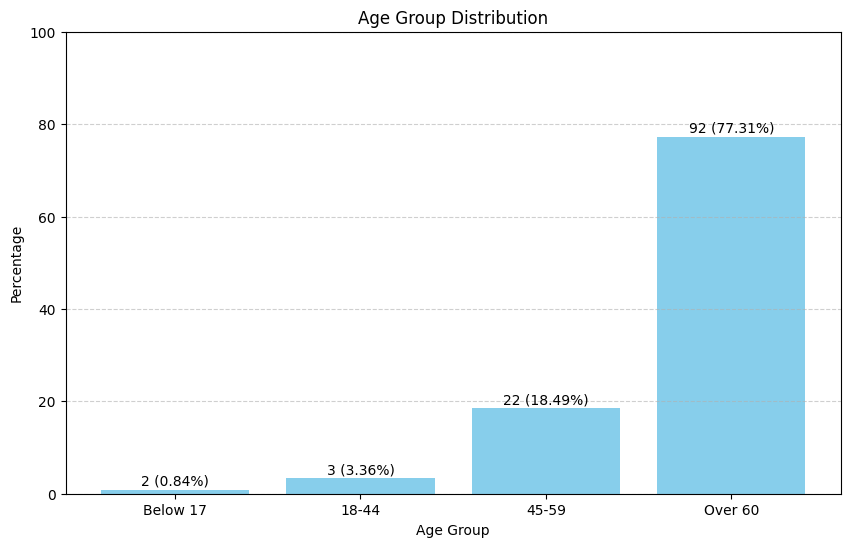

In [ ]:
import matplotlib.pyplot as plt

# Data
##manually type, since they are data descripted in the paper(dataset description)
labels = ['Below 17', '18-44', '45-59', 'Over 60']
values = [2, 3, 22, 92]
percentages = [0.84, 3.36, 18.49, 77.31]

# Create figure and plot
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color='skyblue')

# Add labels
for i in range(len(labels)):
    plt.text(labels[i], percentages[i] + 1, f"{values[i]} ({percentages[i]:.2f}%)", ha='center')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Age Group Distribution')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
##Import libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Visualise some samples
- Each image with its corresponding mask

In [ ]:
def find_images_splitted(main_dir, file_type='png'):
    image_paths = []
    for root, _, files in os.walk(main_dir):
        for file in files:
            if file.lower().endswith('.' + file_type):
                image_paths.append(os.path.join(root, file))

    return image_paths

In [ ]:
import os

data_path = '/content/drive/MyDrive/Comp_course/image_task/shared_oct_retinal/OIMHS%20dataset/Images'
img_dir = os.path.join(data_path, 'input')
mask_dir = os.path.join(data_path, 'mask')

img_path = find_images_splitted(img_dir, 'png')
mask_path = find_images_splitted(mask_dir, 'png')

##I added sorted() to guarantee the corresponding of two list
img_path = sorted(img_path)
mask_path = sorted(mask_path)

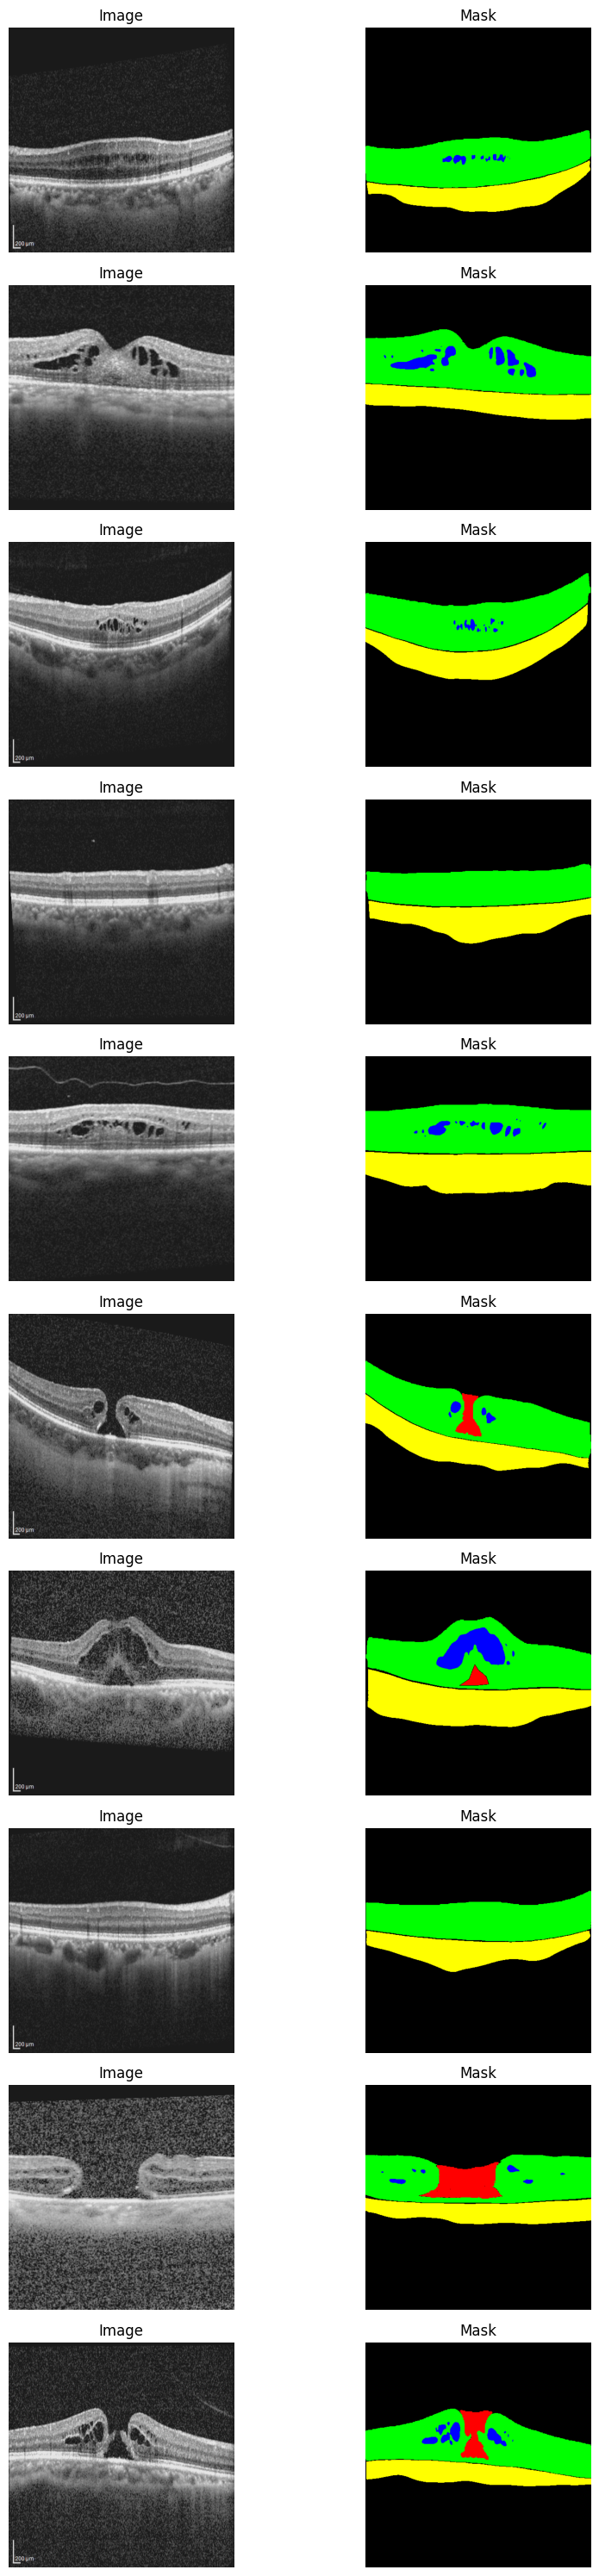

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

##Ploting in 2 ways
# Type1: each column
# Function to plot random image-mask pairs
def plot_random_images(images, masks, num_samples=10):
    paired_data = list(zip(images, masks))
    random.seed(42)
    random_samples = random.sample(paired_data, min(num_samples, len(paired_data)))

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 3))

    for i, (image_path, mask_path) in enumerate(random_samples):
        if i >= num_samples:
            break

        image = Image.open(image_path)
        mask = Image.open(mask_path)

        axes[i, 0].imshow(image)
        axes[i, 0].axis('off')
        axes[i, 0].set_title('Image')

        axes[i, 1].imshow(mask)
        axes[i, 1].axis('off')
        axes[i, 1].set_title('Mask')

    plt.tight_layout()
    plt.show()

plot_random_images(img_path, mask_path)